In [2]:
# Spam Detection (Naive Bayes & Logistic Regression)

In [ ]:
## Install required packages (run once)
##!pip install -q pandas scikit-learn matplotlib seaborn nltk joblib

SyntaxError: invalid syntax (2985210657.py, line 2)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression   # ✅ Add this line
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os


sns.set()

# Load dataset
df = pd.read_csv(r"C:/Project1/spam.csv", encoding='latin-1')[['v1','v2']]
df.columns = ['label','text']
df['label_num'] = df['label'].map({'ham':0,'spam':1})

print(df.head())


  label                                               text  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


Naive Bayes
              precision    recall  f1-score   support

           0     0.9709    1.0000    0.9852       966
           1     1.0000    0.8054    0.8922       149

    accuracy                         0.9740      1115
   macro avg     0.9854    0.9027    0.9387      1115
weighted avg     0.9747    0.9740    0.9728      1115



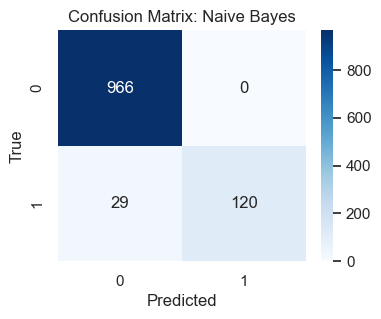

ROC-AUC: 0.9832214765100672
Logistic Regression
              precision    recall  f1-score   support

           0     0.9698    0.9990    0.9842       966
           1     0.9917    0.7987    0.8848       149

    accuracy                         0.9722      1115
   macro avg     0.9808    0.8988    0.9345      1115
weighted avg     0.9728    0.9722    0.9709      1115



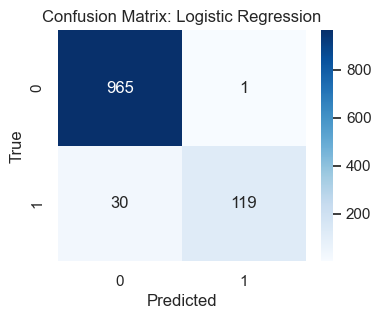

ROC-AUC: 0.9895716092097767
✅ Models and vectorizer saved successfully in the 'models' folder!


In [8]:
# Train-test split
X = df['text']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Vectorize
vec = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
Xtr = vec.fit_transform(X_train)
Xte = vec.transform(X_test)

# Train models
nb = MultinomialNB()
nb.fit(Xtr, y_train)

lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(Xtr, y_train)

# Evaluate function
def eval_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    print(name)
    print(classification_report(y_test, preds, digits=4))
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    if hasattr(model, 'predict_proba'):
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        print('ROC-AUC:', auc)

# Run evaluations
eval_model('Naive Bayes', nb, Xte, y_test)
eval_model('Logistic Regression', lr, Xte, y_test)

# ✅ Create folder if it doesn't exist
import os
os.makedirs('models', exist_ok=True)

# Save vectorizer and model
joblib.dump(vec, 'models/tfidf_vectorizer.joblib')
joblib.dump(lr, 'models/logistic_model.joblib')

print("✅ Models and vectorizer saved successfully in the 'models' folder!")



In [9]:
from joblib import load

# Load the saved TF-IDF vectorizer and logistic regression model
vec = load('models/tfidf_vectorizer.joblib')
model = load('models/logistic_model.joblib')

# Example text (try different ones!)
texts = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts",      # spam
    "Are you coming to class today?",                            # not spam
    "Congratulations! You have won a lottery worth $1000",       # spam
    "Let's meet at 6 PM for dinner"                              # not spam
]

# Predict
preds = model.predict(vec.transform(texts))

# Show results
for msg, pred in zip(texts, preds):
    print(f"📝 Message: {msg}\n➡️ Prediction: {'SPAM 🚨' if pred == 1 else 'NOT SPAM ✅'}\n")


📝 Message: Free entry in 2 a wkly comp to win FA Cup final tkts
➡️ Prediction: NOT SPAM ✅

📝 Message: Are you coming to class today?
➡️ Prediction: NOT SPAM ✅

📝 Message: Congratulations! You have won a lottery worth $1000
➡️ Prediction: SPAM 🚨

📝 Message: Let's meet at 6 PM for dinner
➡️ Prediction: NOT SPAM ✅

